<a href="https://colab.research.google.com/github/MarceloCaram/DataSciencePython/blob/master/Projeto_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="ladoalado"><img src="https://raw.githubusercontent.com/MarceloCaram/DataSciencePython/master/Covid19-02.jpg" width="40%">
</div>

***by Marcelo Caram***

A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial de Saúde, a maioria (cerca de 80%) dos pacientes com COVID-19 podem ser assintomáticos ou oligossintomáticos (poucos sintomas), e aproximadamente 20% dos casos detectados requer atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.




## Origem dos Dados
Analisar um conjunto de dados com essa magnitude não é fácil ainda mais quando temos informações de diferentes fontes, sendo fontes oficiais e não oficiais. O conjunto de dados analisado abaixo foi pego da fonte **Our World in Data** através do link:
* https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv


### Dicionario do nosso DataSet
Neste dataset possuímos várias informações que estão divididas entre linhas e colunas. Antes de analisar um dataset tão importante assim, temos que saber o que cada coluna deste dataset significa. Para saber quais são as descrições do dataset analisado basta acessar o seguinte link [Dicionário de Dados](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md)


##Análise do dataset COVID19 no mundo

In [176]:
# Importação das duas principais libs deste artigo
import pandas as pd
import matplotlib.pyplot as  plt

#importação do dataset dos dados de Covid para a variável dfCov
dfCov = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [177]:
#Analisando os 5 primeiros registros do nosso dataset
dfCov.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [178]:
#Verificando o tamanho do nosso dataset (linhas vs colunas)
print('Tamanho do DataSet:',
      '\nLinhas \t', dfCov.shape[0],
      '\nColunas\t', dfCov.shape[1])

Tamanho do DataSet: 
Linhas 	 31494 
Colunas	 34


In [179]:
#Verificando as colunas existentes no nosso dataset.
dfCov.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

O nome das colunas acima é exatamente o mesmo das colunas que estão no link [Dicionário de Dados](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md)

In [180]:
#Verificando todos os tipos de cada coluna do nosso dataset
dfCov.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Como podemos observar acima a coluna **date** tem o tipo string. Datas com tipo string são ruins para realizar filtros e análises nos datasets. **Abaixo vamos converter o valor da coluna date(do tipo object) PARA date(do tipo data).**

In [181]:
#Converter a coluna "date" em data. Inicialmente a coluna estava no dataset como string (object)
dfCov.date = pd.to_datetime(dfCov.date)

Como temos um dataset de diferentes fontes de informação e não sabemos como e por quem foi preenchido, precisamos saber qual o percentual de colunas onde os valores são nulos. Isso pode influenciar direto no resultado final da nossa análise.

In [182]:
#Obtendo valores nulos do nosso dataset em percentual e order descrecente 
((dfCov.isnull().sum() / dfCov.shape[0])*100).sort_values(ascending=False)

new_tests                          69.648187
new_tests_per_thousand             69.648187
total_tests_per_thousand           68.762304
total_tests                        68.762304
new_tests_smoothed_per_thousand    66.057027
new_tests_smoothed                 66.057027
tests_units                        63.650219
handwashing_facilities             58.925510
extreme_poverty                    40.490252
male_smokers                       29.145234
female_smokers                     28.294278
stringency_index                   19.133803
hospital_beds_per_thousand         17.943100
aged_65_older                      11.224360
gdp_per_capita                     11.002096
aged_70_older                      10.392456
median_age                          9.928875
cardiovasc_death_rate               9.878072
diabetes_prevalence                 6.855274
population_density                  4.467518
life_expectancy                     1.393916
new_deaths_per_million              1.231981
total_deat

Abaixo vamos verificar para data mais atual do nosso dataset (20/07/2020) quais são os registros e seus valores consequentemente. Listamos os valores para a data mais atual em ordem descrecente de **total de casos**. **Lembrando que acima convertemos a coluna date de string para data, pois isso falicita a nossa busca.** Também usamos o comando **LOC** que serve para filtrar valores específicos. Neste caso utilizamos a data como informação de filtro.

In [183]:
dfCov.loc[dfCov.date=='2020-07-20'].sort_values(by='total_cases', ascending=False)[0:6]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
31429,OWID_WRL,NaN,World,2020-07-20,14476729.0,207701.0,605979.0,3942.0,1857.229,26.646,77.741,0.506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
29961,USA,North America,United States,2020-07-20,3773260.0,61796.0,140534.0,415.0,11399.486,186.693,424.571,1.254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
4244,BRA,South America,Brazil,2020-07-20,2098389.0,23529.0,79488.0,716.0,9872.012,110.694,373.957,3.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
13361,IND,Asia,India,2020-07-20,1118043.0,40425.0,27497.0,681.0,810.174,29.293,19.925,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66
23765,RUS,Europe,Russia,2020-07-20,771546.0,0.0,12342.0,0.0,5286.935,0.000,84.572,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
26108,ZAF,Africa,South Africa,2020-07-20,364328.0,13449.0,5033.0,85.0,6142.911,226.763,84.861,1.433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930869e+07,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320,64.13


Pela data mais atual colocada no filtro (20/07/2020), podemos dizer que as cinco maiores localidades com total de casos do Covid19 são:

*   Estados Unidos com 3.773.260
*   Brasil com 2.098.389
*   India com 1.118.043
*   Rússia com 771.546
*   Africa do Sul com 364.328

Executando o comando acima usando a função LOC filtrando a data mais atual podemos observar que no dataset temos uma coluna chamada **location** com o valor **World**. Essa linha foi criada como um totalizador de todas as colunas voltados para o mundo.

Ao executar o comando abaixo pegamos as **5 maiores localizações** para a coluna **total_deaths**. Como fizemos o comando em ordem descrescente não pegamos a posição ZERO, pois para a coluna **total_deaths** a localização World sempre será a maior e não será considerado esse valor no gráfico. Por esse motivo começamos no 1.

In [184]:
#Listando as cincos maiores localizações em ordem descrescente de Total de Mortes 
dfCov.loc[dfCov.date == '2020-07-20', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

,location,total_deaths
29961,United States,140534.0
4244,Brazil,79488.0
29758,United Kingdom,45300.0
18796,Mexico,39184.0
14690,Italy,35045.0


Abaixo foi utilizado uma variação de como usar o comando LOC com mais de um filtro. Usamos as colunas date e location. Selecionamos apenas as informações de quantidade de casos existentes e novos casos no mundo.

In [185]:
#Comando LOC com mais de um filtro. No caso foi considerado a coluna "date" e "location"
dfCov.loc[(dfCov.date=='2020-07-20') & (dfCov.location=='World'),['iso_code','location','total_cases','new_cases']]

,iso_code,location,total_cases,new_cases
31429,OWID_WRL,World,14476729.0,207701.0


Abaixo vamos plotar um gráfico do tipo de barras considerando as cinco maiores localidades com total de mortes pelo COVID19 até a presente data.

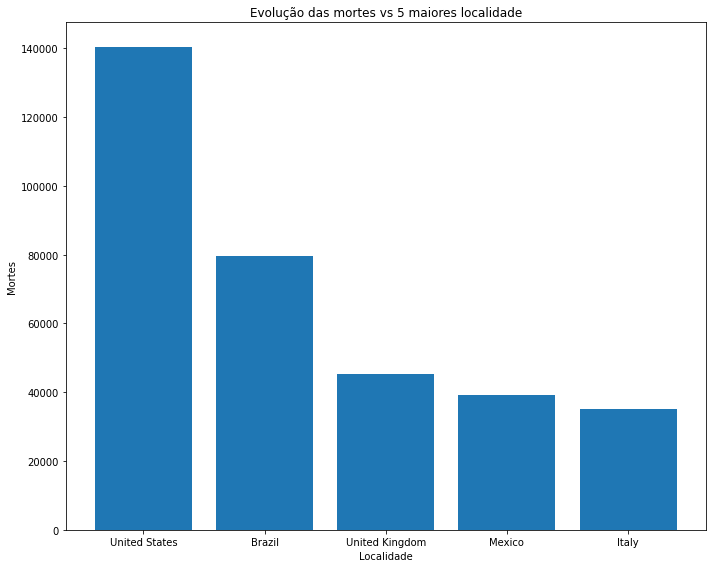

In [186]:
top5_total_deaths = dfCov.loc[dfCov.date == '2020-07-20', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots( figsize=(10,8))

ax.bar('location', 'total_deaths',  data=top5_total_deaths)
ax.set_title('Evolução das mortes vs 5 maiores localidade')
ax.set_xlabel('Localidade')
ax.set_ylabel('Mortes')

plt.tight_layout()


###Qual a progressão do virus no mundo?

Não devemos nos preocupar somente com as medidas de segurança sobre infecção do covid19. As autoridades e a população mundial também deve se preocupar com a progressão do virus.

Um das formas mais eficientes de vermos esse número é através do gráfico de linhas. Portanto vamos plotar um gráfico de linhas para demonstrarmos a evolução de mortes no mundo.

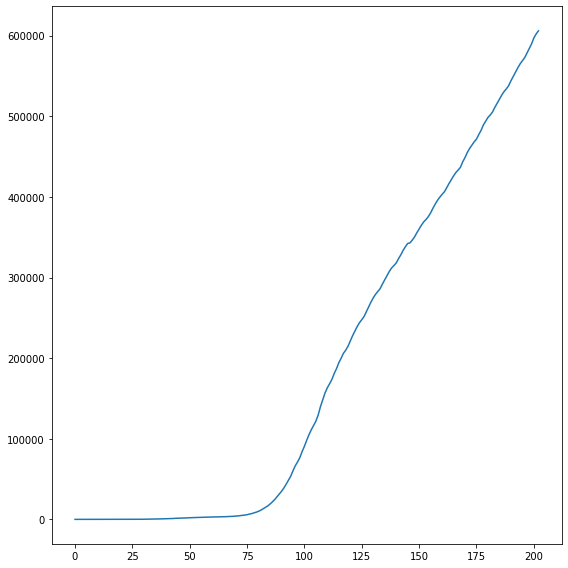

In [187]:
dfCov.loc[dfCov.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(8,8))
plt.tight_layout()

### Análises de Outliers no dataset

Para que possamos passar uma informação para o leitor, este artigo devemos considerar possíveis Outliers no nosso dataset. **Lembrando que Outliers são dados discrepantes que destoam do cojunto de dados analisado.**

#### Qual o tipo de distribuição das variáveis?

Para identificar a distribuição das variáveis, irei colocar a tabela abaixo e plotar o gráfico de histograma em seguida apenas da coluna **new_deaths**.

In [188]:
dfCov.describe().round(1)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,31170.0,31170.0,31170.0,31170.0,31106.0,31106.0,31106.0,31106.0,9838.0,9559.0,9838.0,9559.0,10690.0,10690.0,25468.0,3.143000e+04,30087.0,28367.0,27959.0,28221.0,28029.0,18742.0,28383.0,29335.0,22583.0,22315.0,12936.0,25843.0,31055.0
mean,44931.5,928.9,2449.3,38.9,1008.1,17.1,38.5,0.5,730939.5,16189.1,30.3,0.6,15301.9,0.6,58.3,9.571084e+07,369.8,31.7,9.5,6.0,21672.5,11.4,249.2,8.0,11.0,32.6,53.4,3.2,74.3
std,454223.4,8463.5,23429.1,340.0,2497.2,63.0,120.2,3.0,2797257.7,56991.6,53.0,1.1,51833.1,0.9,30.3,6.420450e+08,1687.9,9.0,6.4,4.4,20758.3,18.6,118.1,4.1,10.5,13.3,31.4,2.6,7.3
min,0.0,-29726.0,0.0,-1918.0,0.0,-437.9,0.0,-41.0,1.0,-3743.0,0.0,-0.4,0.0,0.0,0.0,8.090000e+02,0.1,15.1,1.1,0.5,661.2,0.1,79.4,1.0,0.1,7.7,1.2,0.1,53.3
25%,19.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,25861.5,848.5,1.5,0.1,934.0,0.1,38.0,1.886202e+06,39.5,24.9,3.7,2.2,6171.9,0.5,152.8,5.3,1.9,21.4,22.9,1.4,70.6
50%,362.0,5.0,8.0,0.0,129.1,0.7,1.7,0.0,110584.0,2885.0,8.5,0.2,3192.0,0.2,68.5,8.947027e+06,90.7,31.8,7.2,4.5,15183.6,1.7,236.0,7.1,6.9,31.4,59.6,2.5,75.9
75%,4263.0,91.0,94.0,2.0,810.9,9.8,18.7,0.1,426636.8,9495.5,37.6,0.7,9523.8,0.7,82.4,3.236600e+07,222.9,40.1,14.9,9.7,33132.3,14.8,317.8,10.1,19.6,40.9,83.7,4.2,80.1
max,14476729.0,258061.0,605979.0,10489.0,37016.9,4944.4,1237.6,200.0,45734327.0,851788.0,550.7,19.4,778879.0,15.1,100.0,7.794799e+09,19347.5,48.2,27.0,18.5,116935.6,77.6,724.4,23.4,44.0,78.1,99.0,13.8,86.8


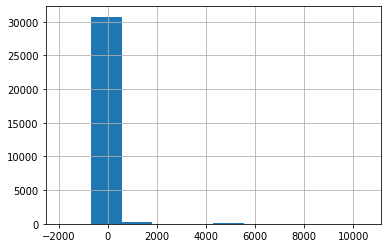

In [189]:
#Plotando o gráfico de histograma para informação de novas mortes
dfCov.new_deaths.hist();

Observando o gráfico acima podemos verificar que para a coluna **new_deaths** existem números negativos, o que não faz muito sentido. Também podemos ver este numero após a execução do comando **describe() para linha min**.

Para tratar este tipo de dado podemos fazer uma cópia do nosso dataset (por segurança) e eliminar os valores que estão destoando no nosso conjunto de dados. Nesse caso queremos limpar do nosso dataset os valores que são **MENOR QUE ZERO** para coluna **NEW_DEATHS**

***Apenas lembrando que este artigo não esta relacionado em como explicar a limpeza dos outliers (dados  que estão destoando do nosso conjunto de dados).***

In [190]:
# identificando os outliers para a variável new_deaths
q1_25 = dfCov.new_deaths.quantile(.25)
q3_75 = dfCov.new_deaths.quantile(.75)
IQR_new = q3_75 - q1_25
print('IQR da variável new_deaths: ', IQR_new)

# definindo os limites                                       
sup_new = q3_75 + 1.5 * IQR_new
inf_new = q1_25 - 1.5 * IQR_new

print('Limite superior de new_deaths: ', sup_new)
print('Limite inferior de new deaths: ', inf_new)

IQR da variável new_deaths:  2.0
Limite superior de new_deaths:  5.0
Limite inferior de new deaths:  -3.0


Plotando o gráfico do tipo **"boxplot"** para verificarmos os outliers da coluna new_deaths antes da limpeza.

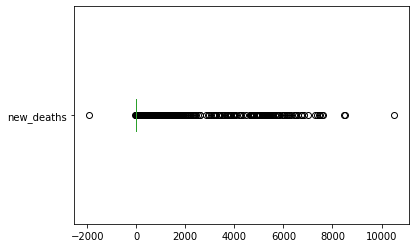

In [191]:
dfCov.new_deaths.plot(kind='box', vert=False);

Como explicado um pouco mais acima, faremos uma cópia do nosso dataset **"dfCov"** evitando assim que possíveis dados possam ser apagados indevidamente e em caso disso acontecer temos um backup. **Lembrando que queremos eliminar do nosso dataset cópia "df_Clean" a coluna new_deaths onde o valor é menor que zero.**

In [192]:
# limpando o dataset
df_clean = dfCov.copy()

df_clean.drop(df_clean[df_clean.new_deaths < 0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', dfCov.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (31494, 34)
Shape após a limpeza:  (31490, 34)


Gráfico do tipo boxplot para coluna **new_deaths** após a limpeza dos outliers.

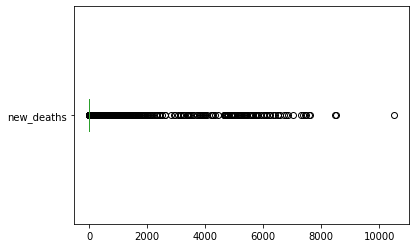

In [193]:
#Plotando o gráfico já com a limpeza dos dados menor que zero para coluna new_deaths
df_clean.new_deaths.plot(kind='box', vert=False);

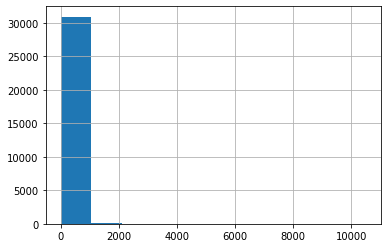

In [194]:
#Plotando o gráfico do tipo histograma após a limpeza dos outliers existentes.
df_clean.new_deaths.hist();

Podemos notar no histograma acima que após a limpeza dos dados (outliers) para coluna new_detahs **NÃO EXISTEM MAIS VALORES MENOR QUE ZERO.**

##Análise do dataset COVID19 no BRASIL

Como vamos analisar somente os dados voltado para o Brasil, vamos fazer uma cópia do nosso dataset original (dfCov).

In [195]:
#Criando uma cópia do dataset original apenas com dados do Brasil
df_bra = dfCov.loc[dfCov.location=='Brazil'].copy()

#Exibindo as cinco primeiras linhas do data set Brasil
df_bra.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4042,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4043,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4044,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4045,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4046,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


**Vamos identificar agora quando foi registrada a primeira morte de covid19 no Brasil.** Para que não fique muito poluido a informação abaixo vamos usar o comando head(1) no final, para que seja considerado apenas a primeira linha retornada. Porém o comando **df_bra.loc[df_bra.new_deaths !=0].sort_values(by='new_deaths', ascending=True)** funciona sem erros.

In [196]:
#Verificando qual foi a data da primeira morte registrada no Brasil
df_bra.loc[df_bra.new_deaths !=0].sort_values(by='new_deaths', ascending=True).head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4120,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [197]:
print('Verificamos que a primeira morte registrada no Brasil foi em {}'.format(df_bra.date.loc[4120]))

Verificamos que a primeira morte registrada no Brasil foi em 2020-03-18 00:00:00


**Abaixo vamos verificar quando foi registrado o primeiro caso de covid19 no Brasil**

In [198]:
#Verificando qual foi a data do primeiro caso registrado no Brasil
df_bra.loc[df_bra.new_cases !=0].sort_values(by='new_cases', ascending=True).head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4099,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [199]:
print('Verificamos que a primeiro caso registrado no Brasil foi em {}'.format(df_bra.date.loc[4099]))

Verificamos que a primeiro caso registrado no Brasil foi em 2020-02-26 00:00:00


Uma informação importante que podemos calcular é quantos dias levou para acontecer a primeira morte de covid19 registrada em comparação com o primeiro caso registrado.

In [200]:
#Calculando a quantidade de dias do primeiro registro de caso de covid em relação há primeira morte
Qtd_dias = df_bra.date.loc[4120] - df_bra.date.loc[4099]
print('Levou {} dias para que acontecesse a primeira morte por covid19 desde o primeiro registro de caso.'.format(Qtd_dias.days))

Levou 21 dias para que acontecesse a primeira morte por covid19 desde o primeiro registro de caso.


Abaixo vamos plotar alguns gráficos de linhas que podemos comparar a evolução de casos vs mortes no Brasil

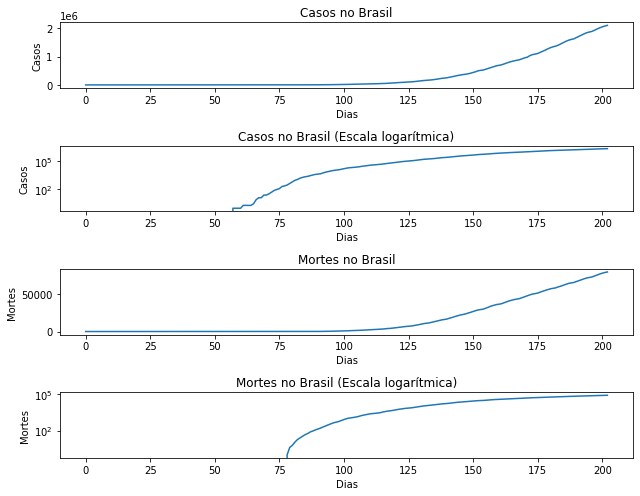

In [201]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais
x = list(range(203))
z = df_bra['total_cases']
z2 = df_bra['total_deaths']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(9, 7))

ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()


E por último vamos plotar um gráfico de linhas fazendo a comparação entre **Novos Casos vs Total de Mortes** no dataset do Brasil.

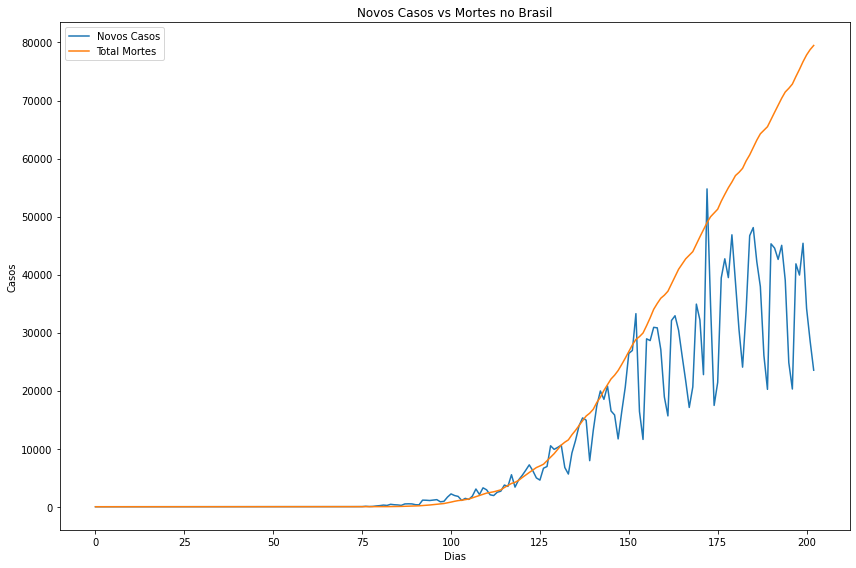

In [202]:
Dias = list(range(203))
New = df_bra['new_cases']
Tot = df_bra['total_deaths']

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax1.set_title('Novos Casos vs Mortes no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(Dias, New, label='Novos Casos')
ax1.plot(Dias, Tot, label='Total Mortes')
ax1.legend()

plt.tight_layout()

## Conclusão

Os dados analisados são equivalente a data atual (20/07/20) e esta base de dados (csv) é atualizado diariamente, portanto a partir do dia 21/07/20 já estará desatualizado, caso não seja analisado novamente.

* Os Estados Unidos é  o país com maior numeros de casos e morte.
* Infelizmente o Brasil teve e esta tendo um crescimento muito alto da doença.
* Se levarmos em consideração a situação atual, os numeros de casos e mortes ainda estão crescendo.



Essa foi uma analise inicial de alguns dados que foram disponibilizados pela fonte de dados. Porém outros tipos de analises podem ser realizadas. Assim com a plotagem de gráficos de diferentes tipos.